In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
# Load train and test datasets
train_file_path = '/content/drive/MyDrive/Datasets/Loan Prediction Problem Dataset/train_u6lujuX_CVtuZ9i.csv'
test_file_path = '/content/drive/MyDrive/Datasets/Loan Prediction Problem Dataset/test_Y3wMUE5_7gLdaTN.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)


In [17]:
# Quick look at the data
print(train_data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [18]:
# Check for missing values in the dataset
print(train_data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [19]:
# Fill missing values
# For numerical features, we'll fill with median
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

# For categorical features, we'll fill with the most frequent value
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
# Check again to confirm missing values have been handled
print(train_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-19-0b69e83a8bd7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
<ipython-input-19-0b69e83a8bd7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [20]:

# Initialize LabelEncoder for binary columns
label_encoder = LabelEncoder()

# Encode the binary categorical columns
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
train_data['Married'] = label_encoder.fit_transform(train_data['Married'])
train_data['Education'] = label_encoder.fit_transform(train_data['Education'])
train_data['Self_Employed'] = label_encoder.fit_transform(train_data['Self_Employed'])
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])  # Target variable


# Use pd.get_dummies to one-hot encode multi-class categorical columns
train_data = pd.get_dummies(train_data, columns=['Dependents', 'Property_Area'], drop_first=True)

# Display the encoded dataset
print(train_data.head())

    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
0  LP001002       1        0          0              0             5849   
1  LP001003       1        1          0              0             4583   
2  LP001005       1        1          0              1             3000   
3  LP001006       1        1          1              0             2583   
4  LP001008       1        0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Dependents_1  Dependents_2  Dependents_3+  \
0            1         False         False          False   
1     

In [21]:

# Scale numerical features
scaler = StandardScaler()
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])  # Feature set without Loan_ID and target column
X_scaled = scaler.fit_transform(X)
y = train_data['Loan_Status']

In [22]:

from sklearn.preprocessing import StandardScaler
# Separate the target variable from the feature set
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])  # 'Loan_ID' is not useful for the model
y = train_data['Loan_Status']

# Apply StandardScaler to the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale only the numerical columns, excluding the one-hot encoded columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
# Apply StandardScaler to the numerical columns only
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [23]:

# Check the scaled data
print(X.head())

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          0              0         0.072991   
1       1        1          0              0        -0.134412   
2       1        1          0              1        -0.393747   
3       1        1          1              0        -0.462062   
4       1        0          0              0         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.273231        0.411733   
1          -0.038732   -0.211241          0.273231        0.411733   
2          -0.554487   -0.948996          0.273231        0.411733   
3           0.251980   -0.306435          0.273231        0.411733   
4          -0.554487   -0.056551          0.273231        0.411733   

   Dependents_1  Dependents_2  Dependents_3+  Property_Area_Semiurban  \
0         False         False          False                    False   
1          True         False          Fal

In [24]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:

# Hyperparameter tuning for Naive Bayes
nb_model = GaussianNB()

param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Adjust the variance smoothing parameter
}

grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb,
                               cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

best_params_nb = grid_search_nb.best_params_
print("Best parameters found for Naive Bayes: ", best_params_nb)

# Update the Naive Bayes model with the best parameters
nb_model = GaussianNB(**best_params_nb)
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Hyperparameter tuning for Random Forest
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                               cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best parameters found for Random Forest: ", best_params_rf)

# Update the Random Forest model with the best parameters
rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Hyperparameter tuning for SVM
svm_model = SVC(probability=True, random_state=42)

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm,
                               cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
print("Best parameters found for SVM: ", best_params_svm)

# Update the SVM model with the best parameters
svm_model = SVC(**best_params_svm, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Hyperparameter tuning for Logistic Regression
lr_model = LogisticRegression(random_state=42)

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2', 'none']
}

grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr,
                               cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
print("Best parameters found for Logistic Regression: ", best_params_lr)

# Update the Logistic Regression model with the best parameters
lr_model = LogisticRegression(**best_params_lr, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found for Naive Bayes:  {'var_smoothing': np.float64(1.0)}
Naive Bayes Accuracy: 0.7783783783783784
Naive Bayes Confusion Matrix:
 [[ 28  37]
 [  4 116]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.43      0.58        65
           1       0.76      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.82      0.70      0.71       185
weighted avg       0.80      0.78      0.75       185

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found for Random Forest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Accuracy: 0.7675675675675676
Random Forest Confusion Matrix:
 [[ 31  34]
 [  9 111]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metrics
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
models = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression']

# Define a function to compute metrics
def compute_metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred, average='weighted'),
            recall_score(y_test, y_test_pred, average='weighted'),
            f1_score(y_test, y_test_pred, average='weighted'))

# Naive Bayes
metrics_nb = compute_metrics(nb_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_nb[0])
test_accuracies.append(metrics_nb[1])
precision_scores.append(metrics_nb[2])
recall_scores.append(metrics_nb[3])
f1_scores.append(metrics_nb[4])

# Random Forest
metrics_rf = compute_metrics(rf_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_rf[0])
test_accuracies.append(metrics_rf[1])
precision_scores.append(metrics_rf[2])
recall_scores.append(metrics_rf[3])
f1_scores.append(metrics_rf[4])

# SVM
metrics_svm = compute_metrics(svm_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_svm[0])
test_accuracies.append(metrics_svm[1])
precision_scores.append(metrics_svm[2])
recall_scores.append(metrics_svm[3])
f1_scores.append(metrics_svm[4])

# Logistic Regression
metrics_lr = compute_metrics(lr_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_lr[0])
test_accuracies.append(metrics_lr[1])
precision_scores.append(metrics_lr[2])
recall_scores.append(metrics_lr[3])
f1_scores.append(metrics_lr[4])

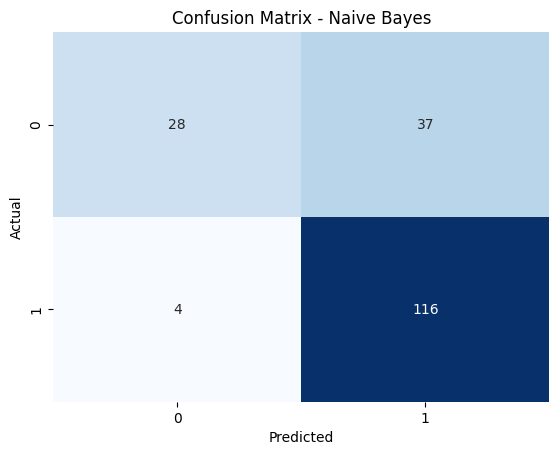

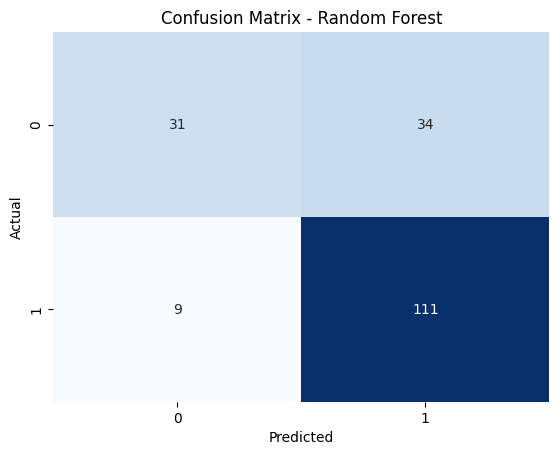

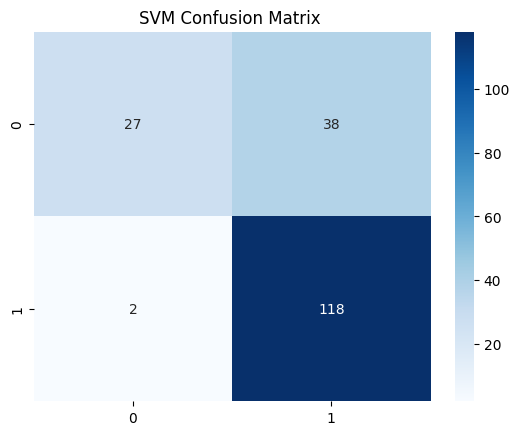

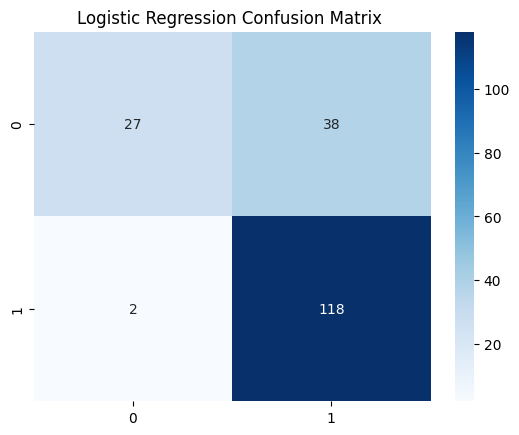

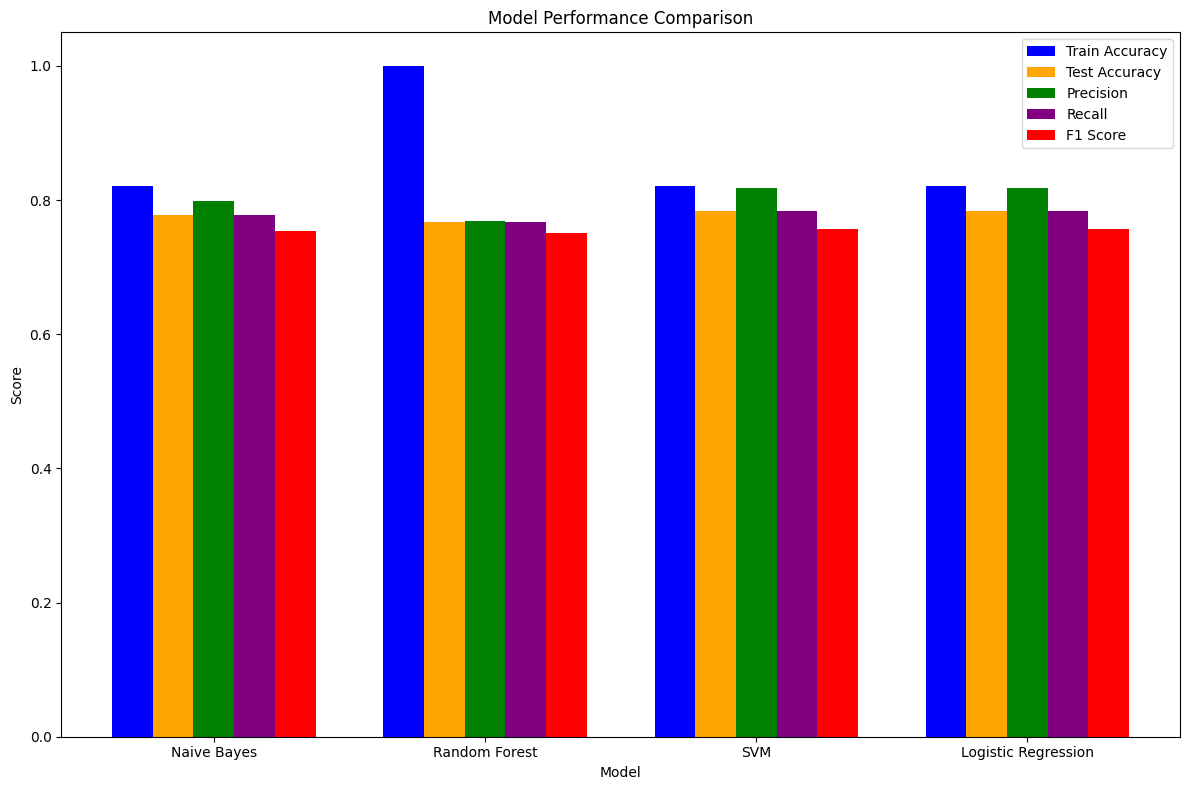

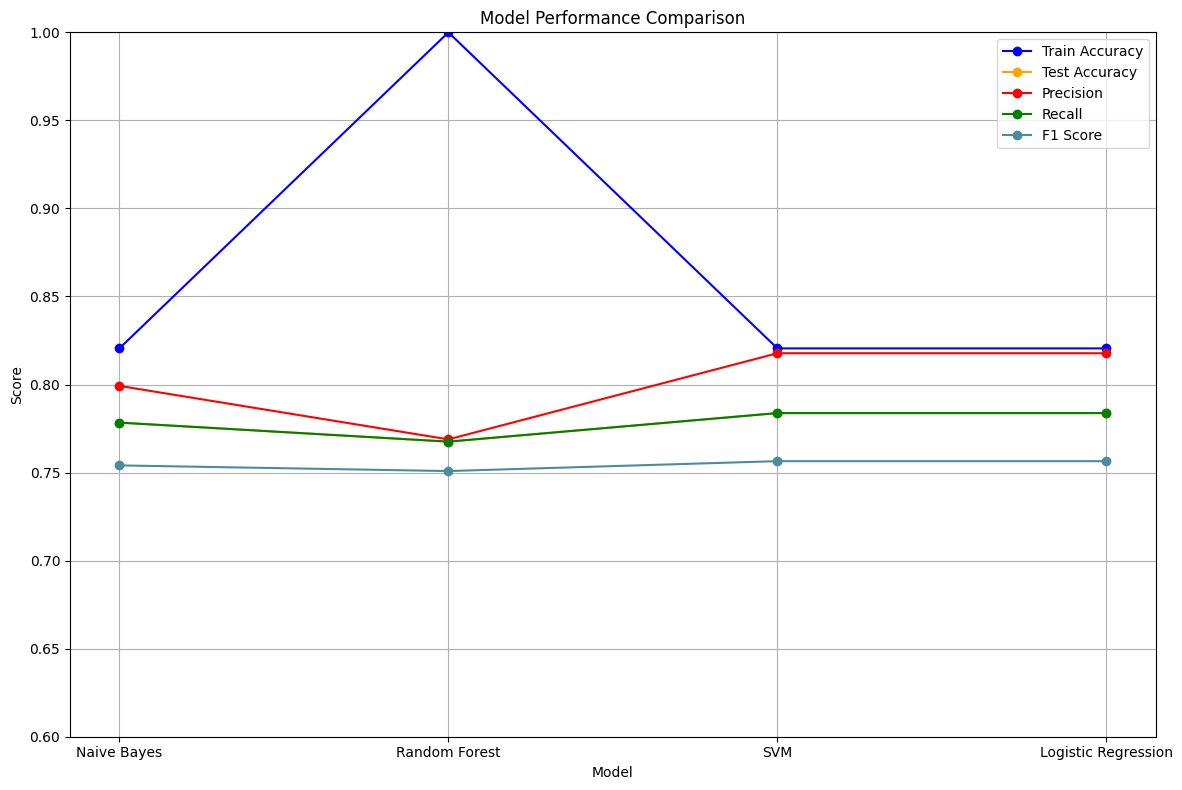

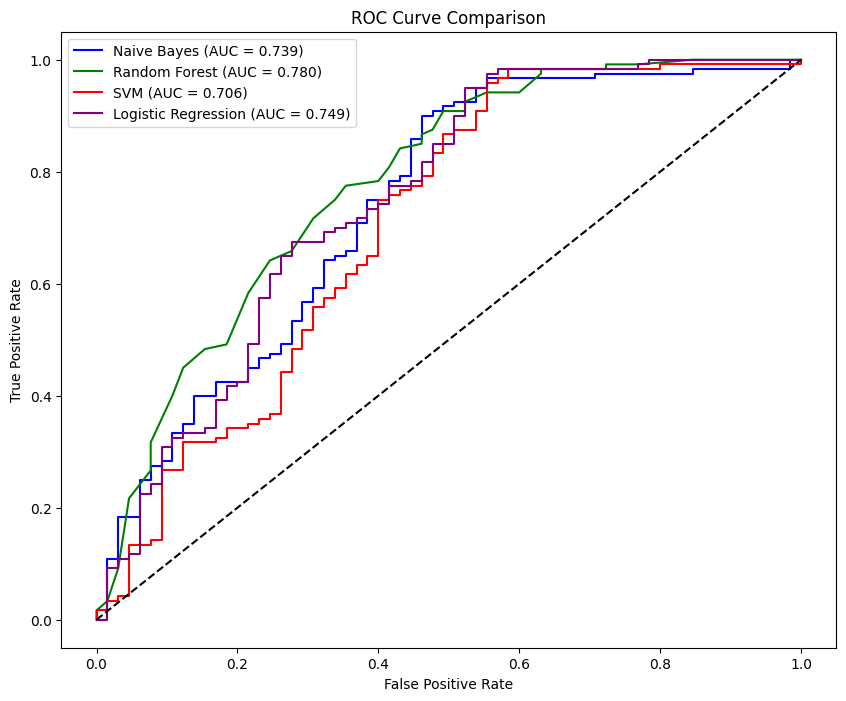

In [29]:

# Confusion Matrix Heatmap for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Naive Bayes")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Confusion Matrix Heatmap for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)  # `y_pred_rf` is from Random Forest predictions
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
# Confusion Matrix Heatmap for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix ")
plt.show()
# Confusion Matrix Heatmap for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix ")
plt.show()
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metrics
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
models = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression']

# Define a function to compute metrics
def compute_metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred, average='weighted'),
            recall_score(y_test, y_test_pred, average='weighted'),
            f1_score(y_test, y_test_pred, average='weighted'))

# Naive Bayes
metrics_nb = compute_metrics(nb_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_nb[0])
test_accuracies.append(metrics_nb[1])
precision_scores.append(metrics_nb[2])
recall_scores.append(metrics_nb[3])
f1_scores.append(metrics_nb[4])

# Random Forest
metrics_rf = compute_metrics(rf_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_rf[0])
test_accuracies.append(metrics_rf[1])
precision_scores.append(metrics_rf[2])
recall_scores.append(metrics_rf[3])
f1_scores.append(metrics_rf[4])

# SVM
metrics_svm = compute_metrics(svm_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_svm[0])
test_accuracies.append(metrics_svm[1])
precision_scores.append(metrics_svm[2])
recall_scores.append(metrics_svm[3])
f1_scores.append(metrics_svm[4])

# Logistic Regression
metrics_lr = compute_metrics(lr_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_lr[0])
test_accuracies.append(metrics_lr[1])
precision_scores.append(metrics_lr[2])
recall_scores.append(metrics_lr[3])
f1_scores.append(metrics_lr[4])

# Plotting
bar_width = 0.15
index = range(len(models))

plt.figure(figsize=(12, 8))

# Plot accuracies
plt.bar(index, train_accuracies, bar_width, label='Train Accuracy', color='blue')
plt.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Test Accuracy', color='orange')

# Plot precision
plt.bar([i + 2 * bar_width for i in index], precision_scores, bar_width, label='Precision', color='green')

# Plot recall
plt.bar([i + 3 * bar_width for i in index], recall_scores, bar_width, label='Recall', color='purple')

# Plot F1 Score
plt.bar([i + 4 * bar_width for i in index], f1_scores, bar_width, label='F1 Score', color='red')

# Labels and Titles
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks([i + 2 * bar_width for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metrics
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
models = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression']

# Define a function to compute metrics
def compute_metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred, average='weighted'),
            recall_score(y_test, y_test_pred, average='weighted'),
            f1_score(y_test, y_test_pred, average='weighted'))

# Compute metrics for each model
metrics_nb = compute_metrics(nb_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_nb[0])
test_accuracies.append(metrics_nb[1])
precision_scores.append(metrics_nb[2])
recall_scores.append(metrics_nb[3])
f1_scores.append(metrics_nb[4])

metrics_rf = compute_metrics(rf_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_rf[0])
test_accuracies.append(metrics_rf[1])
precision_scores.append(metrics_rf[2])
recall_scores.append(metrics_rf[3])
f1_scores.append(metrics_rf[4])

metrics_svm = compute_metrics(svm_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_svm[0])
test_accuracies.append(metrics_svm[1])
precision_scores.append(metrics_svm[2])
recall_scores.append(metrics_svm[3])
f1_scores.append(metrics_svm[4])

metrics_lr = compute_metrics(lr_model, X_train, X_test, y_train, y_test)
train_accuracies.append(metrics_lr[0])
test_accuracies.append(metrics_lr[1])
precision_scores.append(metrics_lr[2])
recall_scores.append(metrics_lr[3])
f1_scores.append(metrics_lr[4])

# Plotting
plt.figure(figsize=(12, 8))

# Plot train and test accuracy
plt.plot(models, train_accuracies, marker='o', label='Train Accuracy', color='blue')  # Darker green
plt.plot(models, test_accuracies, marker='o', label='Test Accuracy', color='orange')    # Darker blue

# Plot precision
plt.plot(models, precision_scores, marker='o', label='Precision', color='red')       # Darker yellowish

# Plot recall
plt.plot(models, recall_scores, marker='o', label='Recall', color='green')             # Darker mint green

# Plot F1 Score
plt.plot(models, f1_scores, marker='o', label='F1 Score', color='#4B8C9B')               # Darker light blue

# Labels and Titles
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0.6, 1.0)  # Set y-axis limits
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# For Naive Bayes
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

# For Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# For SVM (using decision_function instead of predict_proba for SVM)
y_scores_svm = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
auc_svm = roc_auc_score(y_test, y_scores_svm)

# For Logistic Regression
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

plt.plot(fpr_nb, tpr_nb, label="Naive Bayes (AUC = {:.3f})".format(auc_nb), color='blue')
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.3f})".format(auc_rf), color='green')
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = {:.3f})".format(auc_svm), color='red')
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.3f})".format(auc_lr), color='purple')

# Plot diagonal reference line (for random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Plot configuration
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()



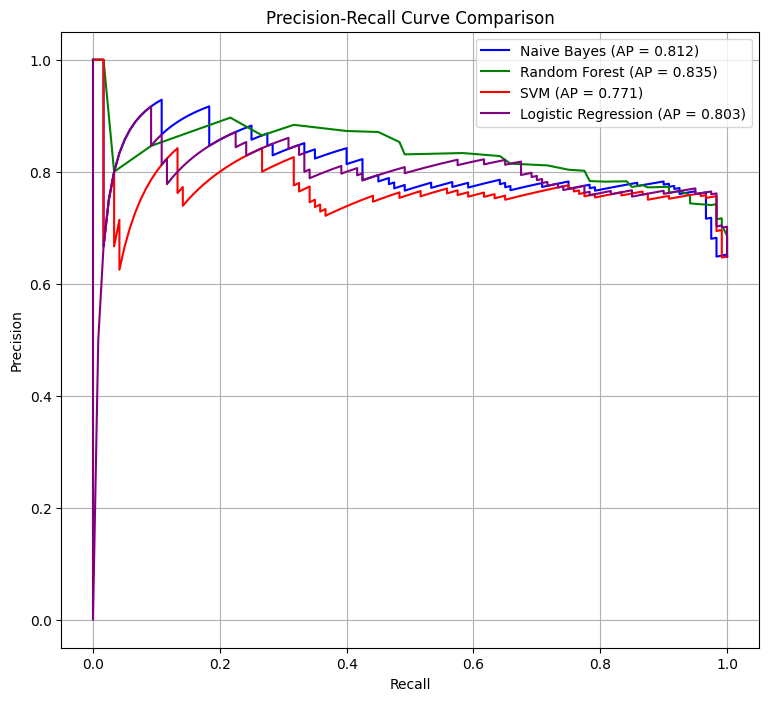

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# For Naive Bayes
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
average_precision_nb = average_precision_score(y_test, y_prob_nb)

# For Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
average_precision_rf = average_precision_score(y_test, y_prob_rf)

# For SVM (using decision_function instead of predict_proba for SVM)
y_scores_svm = svm_model.decision_function(X_test)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
average_precision_svm = average_precision_score(y_test, y_scores_svm)

# For Logistic Regression
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
average_precision_lr = average_precision_score(y_test, y_prob_lr)

# Plot Precision-Recall curves for all models
plt.figure(figsize=(9, 8))

plt.plot(recall_nb, precision_nb, label="Naive Bayes (AP = {:.3f})".format(average_precision_nb), color='blue')
plt.plot(recall_rf, precision_rf, label="Random Forest (AP = {:.3f})".format(average_precision_rf), color='green')
plt.plot(recall_svm, precision_svm, label="SVM (AP = {:.3f})".format(average_precision_svm), color='red')
plt.plot(recall_lr, precision_lr, label="Logistic Regression (AP = {:.3f})".format(average_precision_lr), color='purple')

# Plot configuration
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')
plt.grid()
plt.show()


In [31]:
print("Test Data Columns:", test_data.columns)
print("Test Data Types:\n", test_data.dtypes)


Test Data Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Test Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [32]:
print(test_data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [33]:
print(test_data.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the training dataset
train_file_path = '/content/drive/MyDrive/Datasets/Loan Prediction Problem Dataset/train_u6lujuX_CVtuZ9i.csv'
train_data = pd.read_csv(train_file_path)

# Preprocessing the training data
# Fill missing values
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
train_data['Married'] = label_encoder.fit_transform(train_data['Married'])
train_data['Education'] = label_encoder.fit_transform(train_data['Education'])
train_data['Self_Employed'] = label_encoder.fit_transform(train_data['Self_Employed'])
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

# One-hot encoding for multi-class categorical variables
train_data = pd.get_dummies(train_data, columns=['Dependents', 'Property_Area'], drop_first=True)

# Separate features and target variable
X_train = train_data.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop 'Loan_ID'
y_train = train_data['Loan_Status']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Load the test dataset
test_file_path = '/content/drive/MyDrive/Datasets/Loan Prediction Problem Dataset/test_Y3wMUE5_7gLdaTN.csv'
test_data = pd.read_csv(test_file_path)

# Preprocessing the test data
# Fill missing values (no missing values found in your output)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)

# Encode categorical features in the test data with error handling
def safe_encode(column, encoder):
    """Encodes the column using the provided encoder, handling unknown categories."""
    try:
        return encoder.transform(column)
    except ValueError:
        # If unknown categories are found, fit the encoder to the unique values of the test set
        return encoder.fit_transform(column)

test_data['Gender'] = safe_encode(test_data['Gender'], label_encoder)
test_data['Married'] = safe_encode(test_data['Married'], label_encoder)
test_data['Education'] = safe_encode(test_data['Education'], label_encoder)
test_data['Self_Employed'] = safe_encode(test_data['Self_Employed'], label_encoder)

# One-hot encoding for multi-class categorical variables in test data
test_data = pd.get_dummies(test_data, columns=['Dependents', 'Property_Area'], drop_first=True)

# Ensure the test data has the same columns as the training data
# Retrieve original column names from the training DataFrame before scaling
original_train_columns = X_train.columns

missing_cols = set(original_train_columns) - set(test_data.columns)

# Add missing columns with default value 0
for col in missing_cols:
    test_data[col] = 0

# Reorder the test data columns to match the training set
test_data = test_data[original_train_columns]

# Standardize the test data features
test_data_scaled = scaler.transform(test_data)

# Make predictions using the trained model
loan_approval_predictions = rf_model.predict(test_data_scaled)

# Map predictions to "Yes" or "No" for better readability
predictions_mapped = ["Yes" if pred == 1 else "No" for pred in loan_approval_predictions]

# Add predictions to the test data DataFrame
test_data_with_predictions = pd.DataFrame(test_data_scaled, columns=original_train_columns)
test_data_with_predictions['Loan_Status'] = predictions_mapped

# If you have Loan_ID in the test dataset, include it in the results
if 'Loan_ID' in test_data.columns:
    test_data_with_predictions['Loan_ID'] = test_data['Loan_ID']

# Display the relevant results
result = test_data_with_predictions[['Loan_ID', 'Loan_Status']] if 'Loan_ID' in test_data.columns else test_data_with_predictions[['Loan_Status']]


<ipython-input-34-c05e30d98e6f>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
<ipython-input-34-c05e30d98e6f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [35]:
print(result)

    Loan_Status
0           Yes
1           Yes
2           Yes
3           Yes
4            No
..          ...
362         Yes
363         Yes
364         Yes
365         Yes
366         Yes

[367 rows x 1 columns]
